# Optuna with SKLearn

- Note that test data is used. This is not a good practice. See next notebook for correct usage.


In [1]:
import pandas as pd
import optuna

c:\Users\admin\Coding\research\weld-ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
_X = dataset.data
_y = dataset.target
print(_X.shape, _y.shape)

(442, 10) (442,)


In [3]:
from sklearn.model_selection import train_test_split

_X_train, _X_test, _y_train, _y_test = train_test_split(
    _X, _y, test_size=0.3, random_state=42
)

In [4]:
from sklearn.preprocessing import StandardScaler

scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
y_train = scY.fit_transform(_y_train.reshape(-1, 1)).flatten()
y_test = scY.transform(_y_test.reshape(-1, 1)).flatten()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

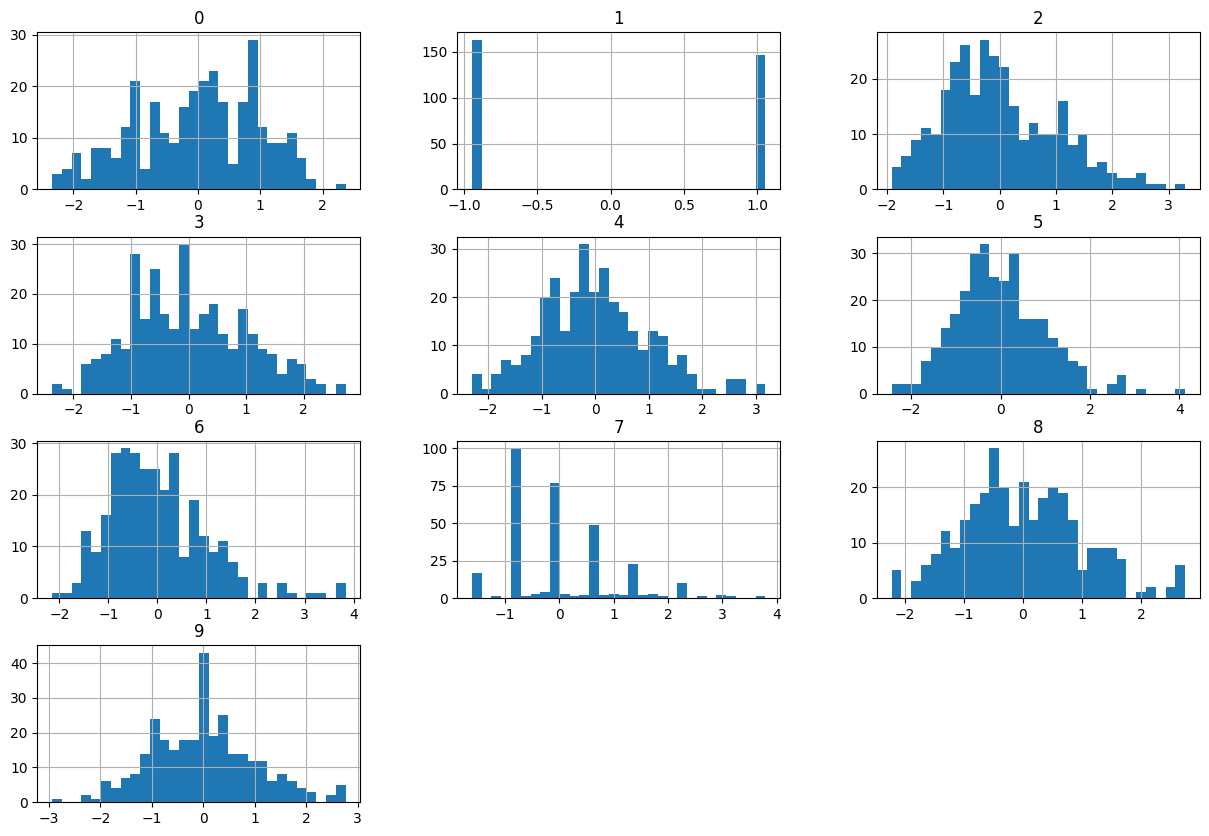

In [5]:
pd.DataFrame(X_train).hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': '0'}>]], dtype=object)

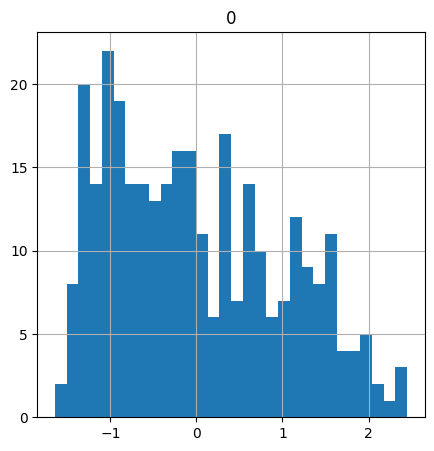

In [6]:
pd.DataFrame(y_train).hist(bins=30, figsize=(5, 5))

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    forrest = RandomForestRegressor(
        n_estimators=n_estimators, max_depth=max_depth, random_state=42
    )
    forrest.fit(X_train, y_train)
    y_pred = forrest.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [8]:
study = optuna.create_study()
study.optimize(objective, n_trials=50)

[I 2026-01-19 06:57:34,937] A new study created in memory with name: no-name-7d0772f4-a43f-45ac-bb30-d75813730748
[I 2026-01-19 06:57:35,057] Trial 0 finished with value: 0.47692369534897977 and parameters: {'n_estimators': 101, 'max_depth': 2}. Best is trial 0 with value: 0.47692369534897977.
[I 2026-01-19 06:57:35,179] Trial 1 finished with value: 0.4448853727811132 and parameters: {'n_estimators': 102, 'max_depth': 3}. Best is trial 1 with value: 0.4448853727811132.
[I 2026-01-19 06:57:35,260] Trial 2 finished with value: 0.44634468630722096 and parameters: {'n_estimators': 61, 'max_depth': 3}. Best is trial 1 with value: 0.4448853727811132.
[I 2026-01-19 06:57:35,371] Trial 3 finished with value: 0.4702200695213073 and parameters: {'n_estimators': 54, 'max_depth': 20}. Best is trial 1 with value: 0.4448853727811132.
[I 2026-01-19 06:57:35,506] Trial 4 finished with value: 0.44645180259003026 and parameters: {'n_estimators': 103, 'max_depth': 4}. Best is trial 1 with value: 0.444885

In [9]:
best_params = study.best_params
print("Best parameters:", best_params)
print("Best MSE:", study.best_value)

Best parameters: {'n_estimators': 197, 'max_depth': 5}
Best MSE: 0.44245746118099144
